# Local projections 

This notebook goes through a simple example of estimating local projections à la Joardà (2005). 
The impulse response of an outcome variable $y_t$ to a variable $x_t$ at horizon $h$ is estimated from 
$$
y_{t+h} = \alpha + \theta_h\epsilon_{t} + \gamma X_t + e_t
$$
where 
* $y_{t}$: outcome variable of interest,
* $\epsilon_{t}$: exogeneous variable,
* $X_{t}$: vector or control variables which can also include lagged values of $y_t$ and $\epsilon_t$, and potentialy contemporaneous values of the other control variables.

The impulse response of $y_t$ with respect to $\epsilon_t$ is given by the coefficients $\{\theta_h\}_{h=0}^H$. 

We will consider the example of the effects of monetary policy on real activity, with $\epsilon_t$ being the nominal interest rate, $y_t$ the log of the real GDP, and $X_t$ containing lagged values of both as well as contemporaneous and lagged values of the log-CPI index and the unemployment rate.
Note that the purpuse of the exercise is not forecasting or causal inference but only to illustrate how to use the code. 

In [1]:
import numpy as np
import statsmodels.api as sm
from local_projections import LocalProjections

Import quarterly macro dataset.

In [2]:
dta = sm.datasets.macrodata.load_pandas().data
dta.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Create nominal interest rate and take log of real GDP and CPI index.

In [3]:
dta["i"] = dta["realint"] + dta["infl"]
for var in ["realgdp", "cpi"]:
    dta[f"{var}_log"] = np.log(dta[var])

Set endogenous, exogenous and control variables.

In [4]:
endog = "realgdp_log"
exog = "i"
controls = ["cpi_log", "unemp"]

Estimate results.

2 lags selected using the AIC criterion


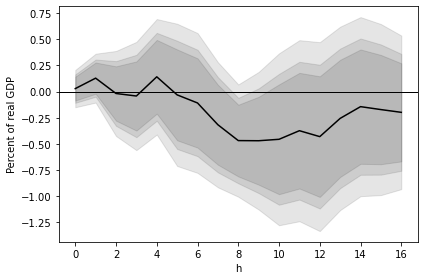

In [5]:
lp = LocalProjections(dta, endog, exog, controls)
irf = lp.fit(
    H=16,
    contemporaneous_control=1,
    scale=100,
    lags_exog=2,
    ylabel="Percent of real GDP",
    displaylag=True,
)

We see the well-documented pattern of real GDP declining by 0.5% about 1 year and a half after a 1% rise in the nominal interest rate. 